In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [35]:
fileName = "/Users/weilu/Research/optimization/chang_database/training_set.txt"
pdb_list = []
with open(fileName) as f:
    for line in f:
        pdbs = line.split()
        pdb_list += pdbs

In [37]:
len(pdb_list)

387

In [60]:
pdb_list = glob.glob("/Users/weilu/Research/optimization/chang_database/cleaned_pdbs/*.pdb")

In [43]:
parser = PDBParser()

In [61]:
info = []
for pdbFile in pdb_list:
    pdb = pdbFile.split("/")[-1][:-4]
    s = parser.get_structure("X", pdbFile)
    residues = list(s.get_residues())
    n = len(residues)
    info.append([pdb, n])

In [71]:
data.to_csv("/Users/weilu/Research/optimization/chang_database/training_set.csv", index_label=0)

In [62]:
data = pd.DataFrame(info, columns=["Protein", "Length"])
data = data.sort_values("Length").reset_index(drop=True)

In [69]:
specific_decoys = data.query("Length < 150 and Length > 70")

In [75]:
specific_decoys

,Protein,Length
26,1BAJ,71
27,1HOE,74
28,1HYP,75
29,1TIF,76
30,1VCC,77
31,1BY9,80
32,1BDO,80
33,451C,82
34,1CC5,83
35,1BB9,83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24f39c50>]],
      dtype=object)

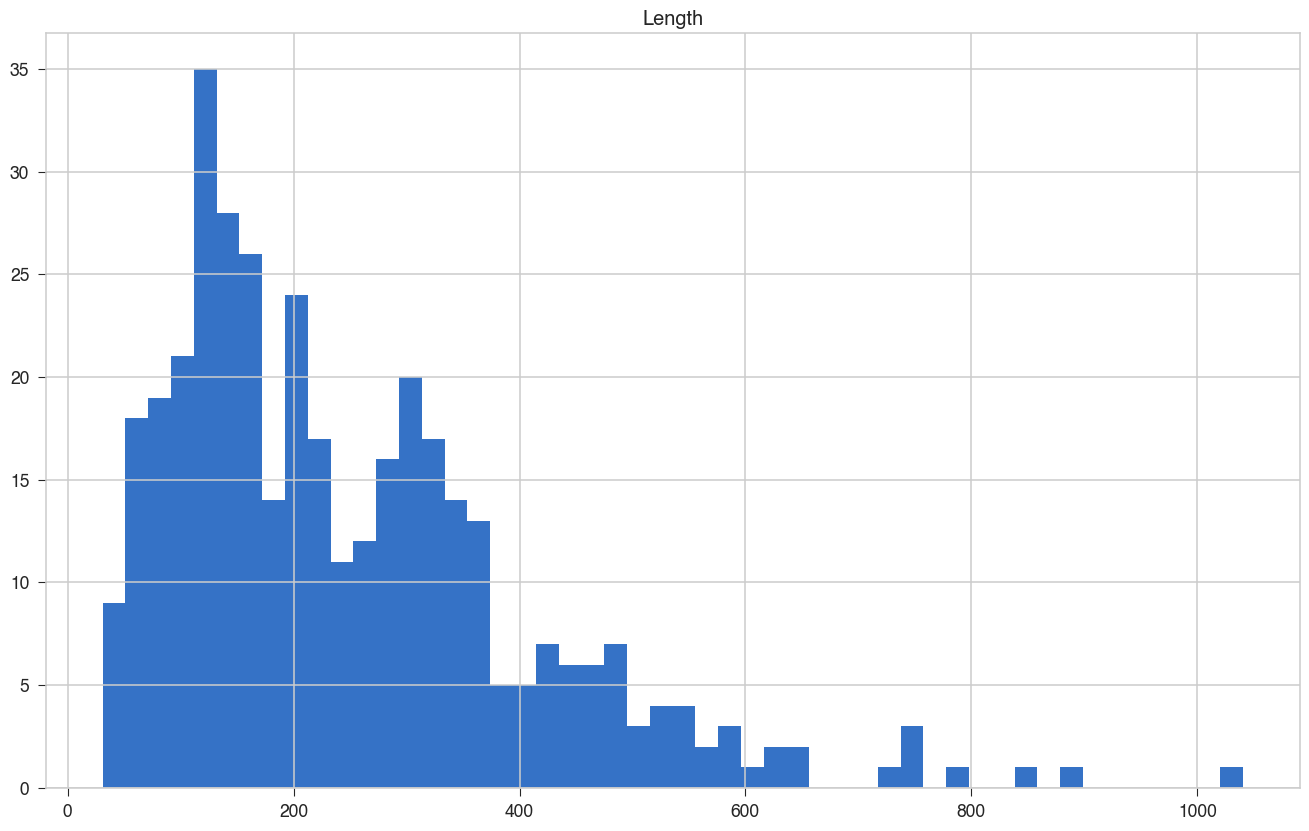

In [64]:
data.hist("Length", bins=50)

In [63]:
data

,Protein,Length
0,1AIE,31
1,1PPT,36
2,1AJJ,37
3,2ERL,40
4,4HB1,44
5,1BHP,45
6,1CBN,46
7,1PTQ,50
8,1BX7,51
9,1RB9,52


In [3]:
data = pd.read_csv("/Users/weilu/Research/database/tabularResults.csv")

In [4]:
data = data.dropna().reset_index(drop=True)

In [5]:
data.columns

Index(['PDB ID', 'Chain ID', 'Residue Count', 'CATH ID [Res Range]',
       'Cath Description', 'SCOP ID [Res Range]', 'Scop Domain', 'Scop Fold',
       'PFAM Acc [Res Range]', 'Pfam ID', 'Pfam Description', 'Chain Length',
       'Sequence and Secondary Structure'],
      dtype='object')

In [7]:
pre = "/Users/weilu/Research/server/dec_2019/orengoftp.biochem.ucl.ac.uk/cath/releases/latest-release/cath-classification-data/cath-domain-list.txt"
data = pd.read_csv(pre, comment="#", sep="\s+", names=["Protein", "C", "A", "T", "H", "S1", "S2", "S3", "S4", "S5", "L", "resolution"])

In [8]:
data = data.astype(str)

In [9]:
data["CATH"] = data["C"] + "." + data["A"] + "." + data["T"] + "."  + data["H"]

In [10]:
# narrow down to 1.10
data = data.query("C == '1' and A == '10'").reset_index(drop=True)

In [11]:
data.query("CATH == '1.10.10.10'").query("Protein == '4yiiA00'")

,Protein,C,A,T,H,S1,S2,S3,S4,S5,L,resolution,CATH
3720,4yiiA00,1,10,10,10,145,1,1,1,1,72,1.8,1.10.10.10


In [12]:
# 60694 domains in 1.10.
# 1.10 has 1226 superfamilies
count_superfamilies = data["CATH"].value_counts()
# 292 superfamilies has more than 20 domains.
# 87 superfamilies has more than 100 domains.

In [13]:
a = count_superfamilies[count_superfamilies>100]
superfamilies = list(a.index)
filtered_data = data.query("CATH in @superfamilies")

In [14]:
# read the list of domains that have structures

In [15]:
s_list = np.loadtxt("/Users/weilu/Research/server/dec_2019/cath_dataset/cath-dataset-nonredundant-S20.list", dtype="str")

In [26]:
s_list = np.loadtxt("/Users/weilu/Research/server/dec_2019/cath_dataset/cath-dataset-nonredundant-S20Clean.list", dtype="str")

In [16]:
len(s_list)

14433

In [27]:
len(s_list)

14224

In [28]:
has_structures = filtered_data.query("Protein in @s_list").reset_index(drop=True)

In [29]:
len(has_structures)

1019

In [30]:
has_structures["L"] = has_structures["L"].astype(int)

In [31]:
has_structures_small = has_structures.query("L < 200")

In [32]:
len(has_structures_small)

911

In [33]:
has_structures_small.to_csv("/Users/weilu/Research/server/jan_2020/cath_dataset_shuffle_optimization/has_structures_small_dataset_cleaned.csv", index=0)

In [25]:
has_structures_small

,Protein,C,A,T,H,S1,S2,S3,S4,S5,L,resolution,CATH
0,3b89A01,1,10,8,10,2,1,1,2,1,54,2.6,1.10.8.10
1,1oksA00,1,10,8,10,6,1,1,1,1,51,1.8,1.10.8.10
2,2ltuA00,1,10,8,10,7,2,1,1,1,62,999.0,1.10.8.10
3,1zv1A00,1,10,8,10,8,1,1,1,1,59,1.6,1.10.8.10
4,1cukA03,1,10,8,10,11,1,1,1,1,48,1.9,1.10.8.10
5,2oo9A00,1,10,8,10,13,2,1,1,1,44,2.1,1.10.8.10
6,3lcuA01,1,10,8,10,14,1,1,2,1,57,2.1,1.10.8.10
7,1p3qQ00,1,10,8,10,15,1,1,1,1,43,1.7,1.10.8.10
8,3bbzA00,1,10,8,10,16,1,1,1,1,48,2.1,1.10.8.10
9,1y8gA03,1,10,8,10,21,2,2,1,1,39,2.5,1.10.8.10


In [75]:
for_optimization = has_structures_small.groupby("CATH").head(1).reset_index(drop=True)

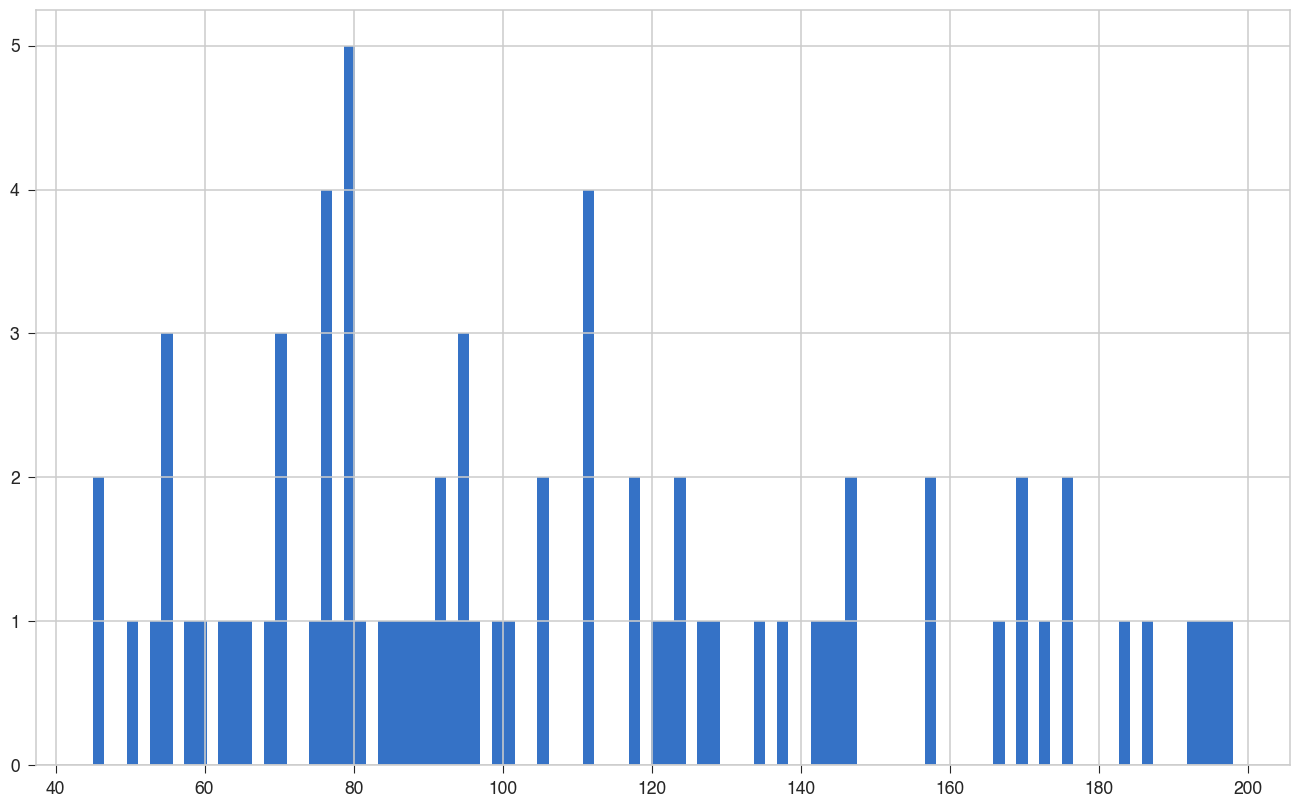

In [76]:
for_optimization["L"].astype(int).hist(bins=100)

In [78]:
for_optimization.to_csv("/Users/weilu/Research/server/dec_2019/optimization_database/for_optimization_dataset.csv")

In [80]:
data = pd.read_csv("/Users/weilu/Research/server/dec_2019/optimization_database/for_optimization_dataset.csv", index_col=0)
data["Protein"].to_list()

In [85]:
a = for_optimization["Protein"].to_list()

In [89]:
print(sorted(a))

['132lA00', '1a75A00', '1b82A02', '1b8fA01', '1bekA01', '1bqbA02', '1cpcB00', '1cscA02', '1cy5A00', '1dv5A00', '1e8yA05', '1evyA02', '1f44A01', '1fkaG00', '1fx0B03', '1g1xB00', '1gteA02', '1gu2A00', '1h19A02', '1hk5A03', '1in4A03', '1kw4A00', '1kx3D00', '1l1fA03', '1m1qA00', '1m3qA02', '1mu5A02', '1qwvA00', '1vq8200', '1vq8P01', '1xb0B00', '1xjtA00', '1xmkA00', '1z0xA01', '1zcaA02', '2cpgB00', '2f6sA00', '2grhA00', '2ii2A04', '2ptsA03', '2q6fB03', '2uxwA02', '2vqeD01', '2vyrA00', '2wh6A00', '3b89A01', '3g0vA00', '3geuA00', '3h7iA02', '3h99A03', '3hrdD02', '3ju5A01', '3k06B00', '3kh1A00', '3nasA02', '3oc7A02', '3p1wA03', '3pyoY00', '3qyhB01', '3tjtA01', '3vgjA02', '3ziaG01', '4annA00', '4bcmD01', '4cxfA01', '4du6E01', '4edmA00', '4fppB01', '4i2aA01', '4i4tB03', '4i6uB00', '4jgsE00', '4kbuK02', '4n73A00', '5fpoA01', '5hgoA01', '5kn9A02']


In [87]:
len(a)

77

In [56]:
len(s_list)

14433

In [39]:
data.shape

(60694, 13)

In [99]:
data = pd.read_csv("/Users/weilu/Research/server/jan_2020/multi_seq_Pfam/data_info_3.csv", index_col=0)

In [100]:
data.shape

(1829, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a705aa828>]],
      dtype=object)

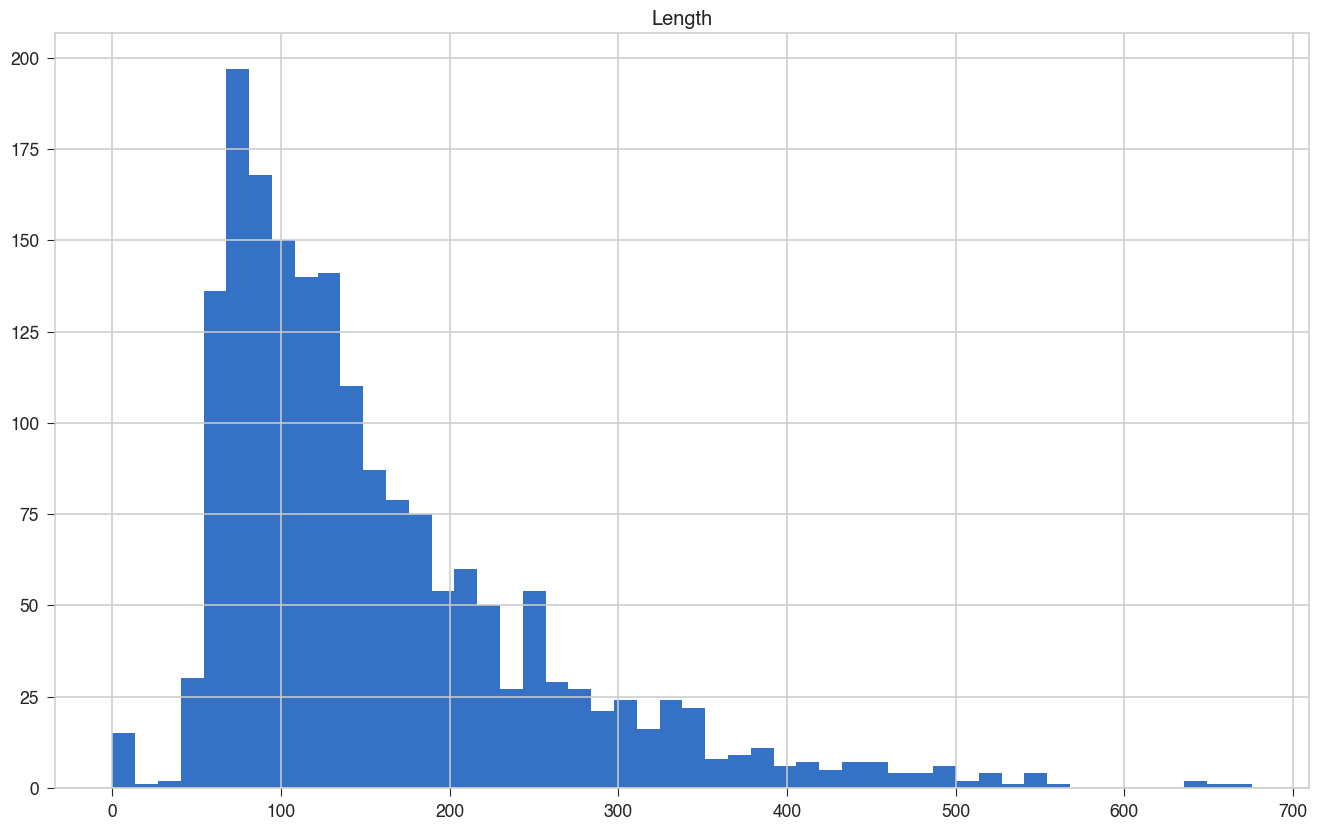

In [103]:
data.hist("Length", bins=50)

In [109]:
d = data.query("Length < 300").query("Problematic != 4").reset_index(drop=True)

In [118]:
def get_MSA_size(location):
    a = None
    with open(location) as f:
        a = f.readlines()
    return len(a)

In [117]:
location = "/Users/weilu/Research/server/jan_2020/multi_seq_Pfam/alignments/1Y7QB_42-131_filtered_0.05.seqs"
get_MSA_size(location)

2475

In [123]:
pre = "/Users/weilu/Research/server/jan_2020/multi_seq_Pfam/alignments"
d["MSA_size"] = d["FullName"].apply(lambda x:get_MSA_size(f"{pre}/{x}_filtered_0.05.seqs"))

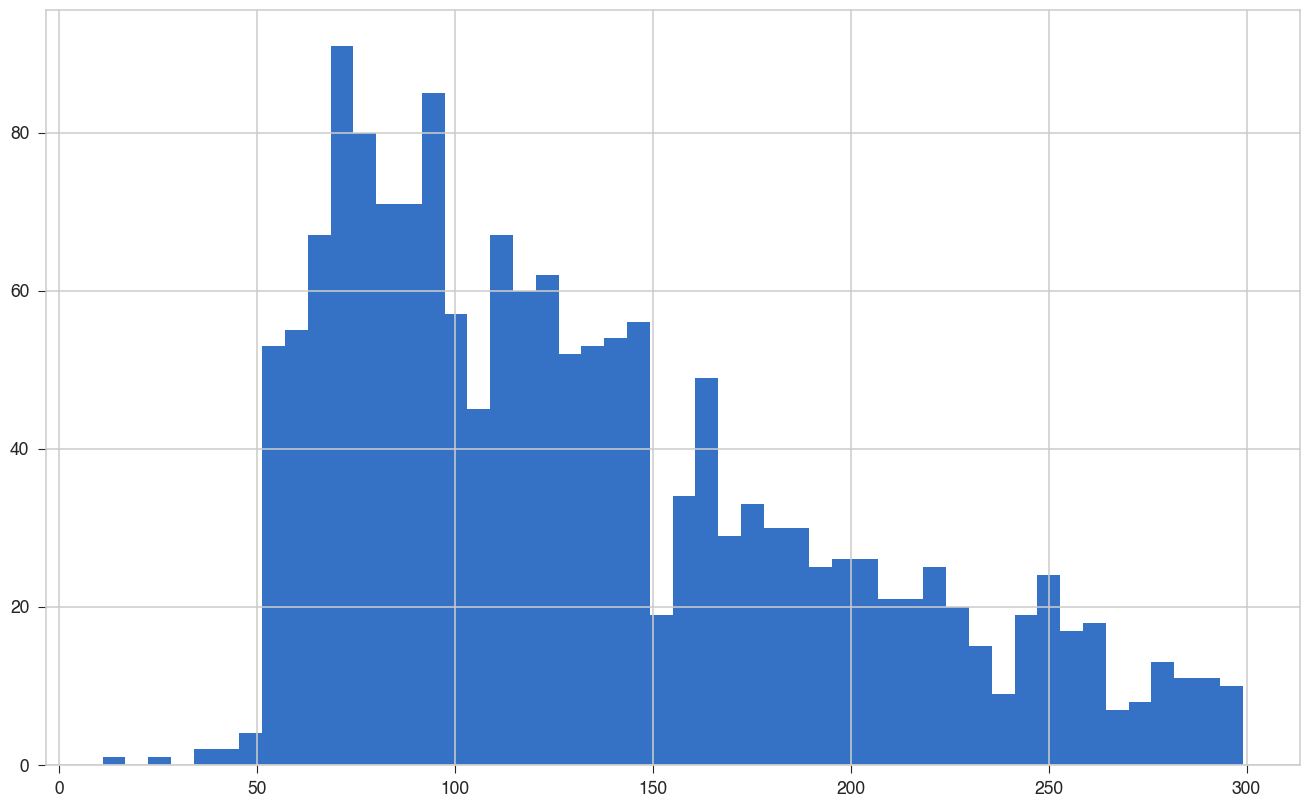

In [124]:
d["Length"].hist(bins=50)

In [126]:
d["SeqLength_diff"] = d["SeqLength"] - d["Length"]

In [132]:
d.shape

(1639, 8)

In [135]:
d2 = d.query("abs(SeqLength_diff) < 5").reset_index(drop=True)

In [140]:
d2.shape

(1228, 8)

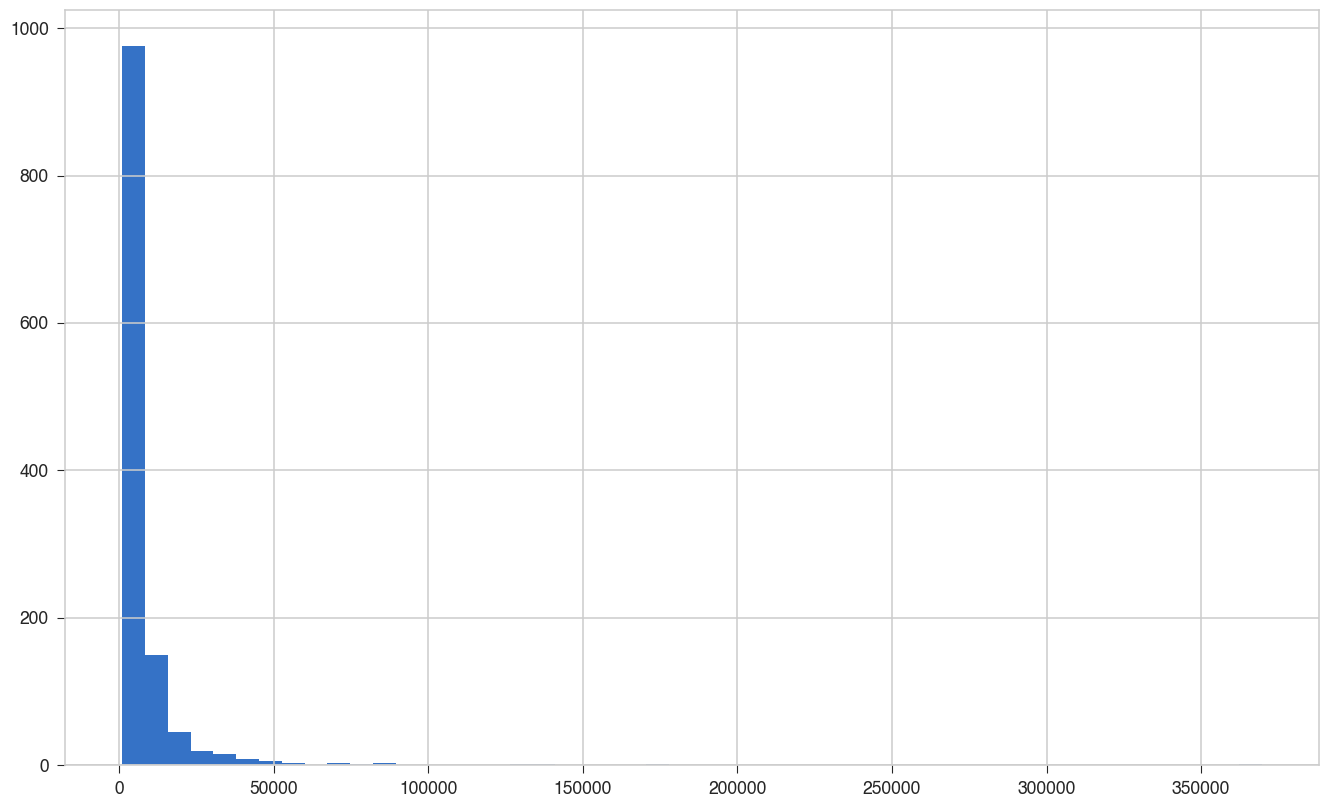

In [138]:
d2["MSA_size"].hist(bins=50)

In [141]:
d2.to_csv("/Users/weilu/Research/database/pfam_selected.csv")

In [144]:
d2 = pd.read_csv("/Users/weilu/Research/database/pfam_selected.csv", index_col=0)

In [77]:
fromFile = "/Users/weilu/Research/server/feb_2020/jeff/feb04_2/original_pdbs/test10_selpro.pdb"
fixer = PDBFixer(filename=fromFile)